## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Fábio Dias
## Número: 42921

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>


In [6]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (5 mil) pontos a duas dimensões, em que a primeira dimensão é uma variável aleatória Gaussina de média 2 e variância 3, e em que a segunda dimensão é uma variável aleatória uniformemente distribuída entre $[-1, 3]$. Os pontos gerados deverão estar num matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

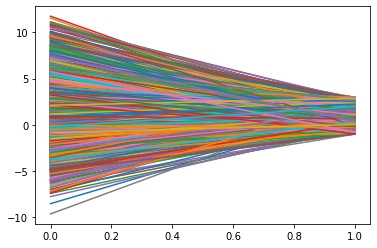

In [92]:
#Criar os pontos para cada dimensão.
#1º rd.normal(2, 3, 5000) -> 5000 pontos, média 2, variância 3.
#2º rd.rand(1, 5000) -> 5000, valores entre 0 e 1.
#Para adaptar os valores para a gama [-1, 3], basta multiplicar por 4 e subtrair 1.
#Finalmente, juntar os dois arrays num só, com o np.vstack((X0, X1))

XGauss = rd.normal(2, 3, 5000)
XUnif = rd.rand(1, 5000)

XGauss = np.reshape(XGauss, (1, 5000))

XUnif[0, :] = (XUnif[0, :] * 4) - 1

X = np.vstack((XGauss, XUnif))

#Vejo que o plot está errado, mas acho que o resto está correcto. (Acredito eu)
#Não o mais eficiente, mas correcto.
plt.plot(X)
plt.show()

# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X+b$ ($A$ matriz de $2\times2$, $b$ vetor de $2\times1$), transforme os dados de modo a estes terem média nula e matriz de covariância igual à matriz de identidade (de notar que a variância da primeira e da segunda dimensão de $X$ são 3 e 4/3, respetivamente).
## b) Através duma transformação matricial do tipo $X3=C\times X2$ ($C$ matriz de $2\times2$), transforme os dados de modo a estes terem a matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## c) Visualize os pontos gerados (matriz $X3$). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

In [102]:
#Por aquilo que percebi, A devia tomar valores que convertiam as médias de cada dimensão para 0 e obter a covariância
#O b é a matriz que permite mover os pontos.

meanX = np.array([0, 0])
varX0 = 3
varX1 = 4/3
Cov = np.cov(X)

A = rd.randn(2,5000)
X2 = np.dot(A, X.T) + Cov

print(X2)

#b
#A matriz C seria a matriz que transformaria os dados de forma a obter a matriz de covariância desejada.
C = np.array([[1/np.sqrt(2.5), 1], [1, 1/np.sqrt(0.5)]])
X3 = np.dot(C, X2)

np.cov(X3)

[[216.89876112 110.46413289]
 [113.66156902  -4.40720207]]


array([[17183.60270033, 25342.82683035],
       [25342.82683035, 37376.26404389]])

# Pergunta 3:
## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

In [96]:
#numero apropriado
numBins = 10000 / 1000

#Claramente tenho algum erro para trás.
#A Matriz X é de 2x5000, a de X3 é de 2x2. Isto não vai dar para concatenar.
#Ainda assim, a pedida é uma matriz de 2x10000. Faltam aqui pontos.
X4 = np.vstack((X, X3))

plt.hist(X4[0, :], bins=numBins, color='blue')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5000 and the array at index 1 has size 2